# Quais dos planos dão mais receita ?

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Etapa 1. Visão geral dos dados](#data_review)
    * [Primeiras conclusões](#data_review_conclusions)
* [Etapa 2. Pré-processamento de dados](#data_preprocessing)
    * [2.1 Duplicatas](#duplicates)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Conclusões intermediárias](#data_preprocessing_conclusions_intermediary)

* [Etapa 3. Transformações dos dados](#tranforamation_data)
* [Etapa 4. Categorização de dados](#categorization_data)
* [Etapa 5. EDA](#eda)
* [Etapa 6. Hipóteses](#hypothesys)
* [Conclusões](#end)

## Introdução <a id='intro'></a>

Você trabalha como analista para a empresa de telecomunicações Megaline. TA empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

### Objetivo: 
Responda a estas perguntas:
 O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. 

Surf:
- `Preço mensal: - $20 ` — 
 500 minutos mensais, 50 mensagens de texto, e 15 GB de dados   
- `Depois de exceder os limites do pacote:`   
1 minuto: 3 centavos,  
1 mensagem de texto: 3 centavos, 
1 GB de dados: $10.

Ultimate:
- `Preço mensal:$70 ` —
3000 minutos mensais, 1000 mensagens de texto, e 30 GB de dados
- `Depois de exceder os limites do pacote:`
1 minuto: 1 centavo,
1 mensagem de texto: 1 centavo,
1 GB de dados: $7.

### Etapas 
- `Os dados sobre o comportamento do usuário é armazenado no arquivo`  

/datasets/megaline_calls.csv 
/datasets/megaline_internet.csv 
/datasets/megaline_messages.csv
/datasets/megaline_plans.csv
/datasets/megaline_users.csv
 - Não há informação sobre a qualidade dos dados, então, você precisará examiná-los antes de testar a hipótese. 

Primeiro, você avaliará a qualidade dos dados e ver se seus problemas são significativos. Depois, durante o pré-processamento de dados, você tentará dar conta dos problemas mais críticos problemas.
 
O seu projeto consistirá em quatro etapas:
 1. Visão geral dos dados
 2. Pré-processamento de dados
 3. Transformações dos dados
 4. Categorização de dados
 5. EDA
 6. Passo 4. Teste as hipóteses:
A receita média dos usuários dos planos Ultimate e Surf são diferentes.
A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.
Você decide quais valores alfa usar.
Explique:
Como você formulou as hipóteses alternativas e nulas.
Qual critério você usou para testar as hipóteses e porquê.
 
[Voltar ao Índice](#back)

## Etapa 1. Visão geral dos dados <a id='data_review'></a>

Abra os dados em Vehicles e explore-os e carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lendo o arquivo e armazenando em df
df_calls = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 4/megaline_calls.csv')
df_internet = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 4/megaline_internet.csv' )
df_messages = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 4/megaline_messages.csv')
df_plans = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 4/megaline_plans.csv')
df_users = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 4/megaline_users.csv')

In [3]:
global dataframes
dataframes = {
    'df_calls': df_calls,
    'df_internet': df_internet,
    'df_messages': df_messages,
    'df_plans': df_plans,
    'df_users': df_users
}

In [4]:
def print_dataframe_info(dataframes):
    for df in dataframes:
        df_name = [name for name, obj in globals().items() if obj is df][0]
        print(df_name)
        print(df.info())
        print()
        print('-------------------------------------------')
        print()


print_dataframe_info([df_calls, df_internet, df_messages, df_plans, df_users])

df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

-------------------------------------------

df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

-------------------------------------------

df_messages
<class 'pan

In [5]:
def print_dataframe_info(dataframes):
    for df in dataframes:
        df_name = [name for name, obj in globals().items() if obj is df][0]
        print(df_name)
        print(df.info())
        print()
        print('-------------------------------------------')
        print()  

In [6]:
print_dataframe_info([df_calls, df_internet, df_messages, df_plans, df_users])

df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

-------------------------------------------

df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

-------------------------------------------

df_messages
<class 'pan

In [7]:
# imprima uma amostragem dos dados
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [8]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Primeiras conclusões <a id='data_review_conclusions'></a> 

Observamos a presença de valores ausentes em algumas colunas, e não identificamos nenhum erro relacionado ao estilo dessas colunas. A fim de garantir a integridade de nossa pesquisa, faremos uma investigação mais detalhada para lidar com essa situação.

[Voltar ao Índice](#back)

## Etapa 2. Pré-processar dados <a id='data_preprocessing'></a>

### Duplicatas <a id='duplicates'></a>
Encontrando de duplicatas óbvias na tabela usando um comando:

In [12]:

for name, df in dataframes.items():
    duplicate_values = df.duplicated().sum()
    print(f"DataFrame: {name}")
    print(f"Valores duplicados: {duplicate_values}")
    print('-------------------------------------------')

DataFrame: df_calls
Valores duplicados: 0
-------------------------------------------
DataFrame: df_internet
Valores duplicados: 0
-------------------------------------------
DataFrame: df_messages
Valores duplicados: 0
-------------------------------------------
DataFrame: df_plans
Valores duplicados: 0
-------------------------------------------
DataFrame: df_users
Valores duplicados: 0
-------------------------------------------


Não há valores duplicados

### Valores ausentes <a id='missing_values'></a>
Há valores ausentes nas colunas 

In [13]:
def print_dataframe_null_counts(dataframes):
    for df_name, df in dataframes.items():
        print(df_name)
        print(df.isna().sum())
        print()
        print('-------------------------------------------')
        print()

In [14]:
print_dataframe_null_counts(dataframes)

df_calls
id           0
user_id      0
call_date    0
duration     0
dtype: int64

-------------------------------------------

df_internet
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

-------------------------------------------

df_messages
id              0
user_id         0
message_date    0
dtype: int64

-------------------------------------------

df_plans
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

-------------------------------------------

df_users
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

-------------------------------------------



No contexto da coluna 'churn_date' do DataFrame 'df_users', observa-se a presença de dados ausentes. Essa coluna indica a data em que um usuário deixou de utilizar o serviço. Portanto, quando há valores ausentes nessa coluna, é coerente inferir que o usuário ainda está utilizando o plano de serviço.

[Voltar ao Índice](#back)

### Conclusões intermediárias <a id='data_preprocessing_conclusions_intermediary'></a>

Após uma análise detalhada, constatamos que as demais colunas estão em conformidade com as expectativas. Agora, procederemos à verificação e correção dos tipos de dados presentes no conjunto de dados.

## Etapa 3. Transformação de dados <a id='tranforamation_data'></a>

In [15]:
for df_name, df in dataframes.items():
    for column in df.columns:
        value_counts = df[column].value_counts(ascending=False)
        print(f"DataFrame: {df_name}")
        print(f"Coluna: {column}")
        print(value_counts)
        print('-------------------------------------------')

DataFrame: df_calls
Coluna: id
id
1000_93      1
1329_1214    1
1329_1253    1
1329_1252    1
1329_1245    1
            ..
1166_90      1
1166_89      1
1166_88      1
1166_87      1
1499_203     1
Name: count, Length: 137735, dtype: int64
-------------------------------------------
DataFrame: df_calls
Coluna: user_id
user_id
1324    1300
1077    1224
1334    1140
1362    1121
1320    1080
        ... 
1104       4
1323       3
1306       3
1452       3
1034       2
Name: count, Length: 481, dtype: int64
-------------------------------------------
DataFrame: df_calls
Coluna: call_date
call_date
2018-12-27    1091
2018-12-28    1085
2018-12-30    1080
2018-12-24    1078
2018-12-29    1070
              ... 
2018-01-17       6
2018-01-26       6
2018-01-15       5
2018-01-18       4
2018-01-24       3
Name: count, Length: 351, dtype: int64
-------------------------------------------
DataFrame: df_calls
Coluna: duration
duration
0.00     26834
4.02       102
8.37       102
3.91       101

Verificamos que as demais colunas estão nos conformes, e valores estão coerentes, apenas iremos alterar as colunas que são datas para ficar no formato 'datetime'

In [16]:
# transformando valores de data em datatime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

[Voltar ao Índice](#back)

## Etapa 4. Categorização de dados <a id='categorization_data'></a>

Iremos fazer um 'merge', uma junção de todos os DataFrame, vinculados pelo 'user_id'. Em algumas ocasiões irão ficar nulos, pois poderá acontecer que uma pessoa não use todos os serviços do plano. Primeiramente iremos separar pelo mês de ultilização dos serviços do plano.

Iremos verificar o serviço de ligação e criar uma coluna 'month' com o mês de utilização desse serviço.

In [17]:
df_calls['month'] = df_calls['call_date'].dt.month
df_users_calls = df_users.merge(df_calls, on=['user_id'],how="left")

In [18]:
df_users_calls.isna().sum()

user_id            0
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date    128753
id                19
call_date         19
duration          19
month             19
dtype: int64

Como analisamos acima 19 pessoas não utilizaram do serviço de ligação, iremos substituir o valor por 0.

In [19]:
df_users_calls[['id','call_date','duration','month']] = df_users_calls[['id','call_date','duration','month']].fillna(0)

Iremos verificar o serviço de internet e criar uma coluna 'month' com o mês de utilização desse serviço.

In [20]:
df_internet['month'] = df_internet['session_date'].dt.month
df_users_internet = df_users.merge(df_internet, on=['user_id'],how="left")

In [21]:
df_users_internet.isna().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      97368
id                 11
session_date       11
mb_used            11
month              11
dtype: int64

Como analisamos acima 11 pessoas não utilizaram do serviço de internet, iremos substituir o valor por 0.

In [22]:
df_users_internet[['id','session_date','mb_used','month']] = df_users_internet[['id','session_date','mb_used','month']].fillna(0)

Iremos verificar o serviço de mensagens e criar uma coluna 'month' com o mês de utilização desse serviço.

In [23]:
df_messages['month'] = df_messages['message_date'].dt.month
df_users_messages = df_users.merge(df_messages, on=['user_id'],how="left")

In [24]:
df_users_messages.isna().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      71743
id                 98
message_date       98
month              98
dtype: int64

In [25]:
df_users_messages[['id','message_date','month']] = df_users_messages[['id','message_date','month']].fillna(0)

Agora iremos calcular as somas das seguintes métricas para cada usuário, agrupadas por mês:

 - Duração total das chamadas
- Quantidade total de mensagens
- Megabytes totais de internet utilizados

Essas somas serão calculadas separadamente para cada mês correspondente em cada usuário.

In [26]:
df_users_calls_group = df_users_calls.groupby(['user_id','month'])['duration'].agg('sum').reset_index().rename(columns={"duration":"total_duration_calls"})
df_users_internet_group = df_users_internet.groupby(['user_id','month'])['mb_used'].agg('sum').reset_index().rename(columns={"mb_used":"total_mb_used_internet"})
df_users_messages_group = df_users_messages.groupby(['user_id','month'])['id'].agg('count').reset_index().rename(columns={"id":"count_messages"})

Unificar todos os DataFrames em um único DataFrame

In [27]:
df_final = df_users_internet_group.merge(df_users_calls_group,how='outer')
df_final = df_final.merge(df_users_messages_group,how = 'outer')

In [28]:
df_final.isna().sum()

user_id                     0
month                       0
total_mb_used_internet    112
total_duration_calls      123
count_messages            496
dtype: int64

A junção dos DataFrames foi realizada corretamente, porém há colunas que estão todas preenchidas com '0' pois não há registo de ultização ou sem um mês para que possamos alocar, iremos excluir esses dados para não atrapalhar em nossas pesquisas.

In [29]:
df_final_full = df_final.merge(df_users,on=['user_id'],how="right")

In [30]:
df_final_full.head()

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,1901.47,116.83,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8.0,6919.15,171.14,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9.0,13314.82,297.69,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10.0,22330.49,374.11,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11.0,18504.30,404.59,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT


### Calculando Receita Mensal para cada Usuário

In [31]:
df_final_plans = df_final_full.merge(df_plans,left_on='plan' ,right_on='plan_name',how="left")

In [32]:
def preencher_exceeded_plans(row):
    if row['plan_name'] == 'surf':
        if row['total_duration_calls'] > row['minutes_included']:
            exceeded_calls = int(row['total_duration_calls']) - int(row['minutes_included']) + 1
        else:
            exceeded_calls = 0

        if row['total_mb_used_internet'] > row['mb_per_month_included']:
            exceeded_internet = int(int(row['total_mb_used_internet']) - int(row['mb_per_month_included'])) / 1024 + 1
        else:
            exceeded_internet = 0

        if row['count_messages'] > row['messages_included']:
            exceeded_messages = int(row['count_messages']) - int(row['messages_included'])
        else:
            exceeded_messages = 0

    elif row['plan_name'] == 'ultimate':
        if row['total_duration_calls'] > row['minutes_included']:
            exceeded_calls = float(row['total_duration_calls']) - float(row['minutes_included'])
        else:
            exceeded_calls = 0

        if row['total_mb_used_internet'] > row['mb_per_month_included']:
            exceeded_internet = int(int(row['total_mb_used_internet']) - int(row['mb_per_month_included'])) / 1024 + 1
        else:
            exceeded_internet = 0

        if row['count_messages'] > row['messages_included']:
            exceeded_messages = int(row['count_messages']) - int(row['messages_included'])
        else:
            exceeded_messages = 0

    return exceeded_calls, exceeded_internet, exceeded_messages



In [33]:
exceeded_values = df_final_plans.apply(preencher_exceeded_plans, axis=1)
df_final_plans['exceeded_calls'] = [value[0] for value in exceeded_values]
df_final_plans['exceeded_internet'] = [value[1] for value in exceeded_values]
df_final_plans['exceeded_messages'] = [value[2] for value in exceeded_values]

Nesta função combinada, verificamos o valor do plano (plan_name) e, em seguida, calculamos os valores excedentes para chamadas, internet e mensagens com base nas condições fornecidas. Os valores excedentes são armazenados nas variáveis exceeded_calls, exceeded_internet e exceeded_messages.

In [34]:
df_final_plans

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_calls,exceeded_internet,exceeded_messages
0,1000,12.0,1901.47,116.83,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,30720,3000,70,7,0.01,0.01,ultimate,0,0.000000,0
1,1001,8.0,6919.15,171.14,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,0.000000,0
2,1001,9.0,13314.82,297.69,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,0.000000,0
3,1001,10.0,22330.49,374.11,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,7.806641,3
4,1001,11.0,18504.30,404.59,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,4.070312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1499,9.0,12984.76,330.37,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,0.000000,0
2396,1499,10.0,19492.43,363.28,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,5.035156,0
2397,1499,11.0,16813.83,288.56,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,2.418945,0
2398,1499,12.0,22059.21,468.10,NaN,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,7.541992,0


Agora iremos calcular a receita total de cada usuáio por mês mediante ao plano que usa, já incluido com o preço e penalidades em um somatório , que resultará num valor em dolar que usuário deve pagar.

In [35]:
df_final_plans['revenue'] = (((df_final_plans['exceeded_calls'])*df_final_plans['usd_per_minute'])+((df_final_plans['exceeded_internet'])*df_final_plans['usd_per_gb'])+((df_final_plans['exceeded_messages'])*df_final_plans['usd_per_message']))+df_final_plans['usd_monthly_pay']

In [36]:
df_final_plans.sort_values(by='revenue', ascending=False)

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_calls,exceeded_internet,exceeded_messages,revenue
1837,1379,12.0,70931.59,1045.24,126.0,Jarrett,Spencer,34,"Grand Rapids-Kentwood, MI MSA",2018-10-18,...,500,20,10,0.03,0.03,surf,546,55.268555,76,591.345547
596,1121,12.0,66863.89,NaN,97.0,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,...,500,20,10,0.03,0.03,surf,0,51.295898,47,534.368984
1422,1292,12.0,52034.66,132.65,NaN,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,...,500,20,10,0.03,0.03,surf,0,36.814453,0,388.144531
1418,1292,8.0,51809.35,304.67,NaN,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,...,500,20,10,0.03,0.03,surf,0,36.594727,0,385.947266
1182,1240,8.0,49950.58,1038.88,15.0,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,...,500,20,10,0.03,0.03,surf,539,34.779297,0,383.962969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1259,10.0,1953.30,92.40,41.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,...,500,20,10,0.03,0.03,surf,0,0.000000,0,20.000000
1288,1259,11.0,3239.70,99.09,32.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,...,500,20,10,0.03,0.03,surf,0,0.000000,0,20.000000
1289,1259,12.0,1078.27,177.98,36.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,...,500,20,10,0.03,0.03,surf,0,0.000000,0,20.000000
1291,1261,2.0,7045.44,53.34,11.0,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,...,500,20,10,0.03,0.03,surf,0,0.000000,0,20.000000


In [37]:
df = df_final_plans[['user_id','total_mb_used_internet','total_duration_calls','count_messages','month','first_name','last_name','age','city','reg_date','plan_name','revenue']]

In [38]:
df_month_nan = df[df['month']==0]

In [39]:
df_month_nan.head(5)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
37,1009,NaN,NaN,1.0,0.0,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,20.0
47,1010,NaN,NaN,1.0,0.0,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,20.0
57,1012,NaN,NaN,1.0,0.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,20.0
78,1021,NaN,NaN,1.0,0.0,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,20.0
87,1022,NaN,NaN,1.0,0.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,20.0


In [40]:
df_month_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 37 to 2399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 107 non-null    int64         
 1   total_mb_used_internet  11 non-null     float64       
 2   total_duration_calls    19 non-null     float64       
 3   count_messages          98 non-null     float64       
 4   month                   107 non-null    float64       
 5   first_name              107 non-null    object        
 6   last_name               107 non-null    object        
 7   age                     107 non-null    int64         
 8   city                    107 non-null    object        
 9   reg_date                107 non-null    datetime64[ns]
 10  plan_name               107 non-null    object        
 11  revenue                 107 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)

In [41]:
(df_month_nan.shape[0] / df.shape[0]) * 100

4.458333333333334

4% do nosso DataFrame não tem os meses preenchidos, podemos excluir esses dados que não afetará em nossa pesquisa.

In [42]:
df = df[df['month']!=0]

In [43]:
df['count_messages'] = df['count_messages'].fillna(0)
df['total_mb_used_internet'] = df['total_mb_used_internet'].fillna(0)
df['total_duration_calls'] = df['total_duration_calls'].fillna(0)

In [44]:
def format_revenue(revenue):
    formatted_revenue = round(revenue, 2)
    if revenue * 1000 % 10 > 0:
        formatted_revenue += 0.01
    return round(formatted_revenue, 2)

In [45]:
df['revenue'] = df['revenue'].apply(format_revenue)

Essa função format_revenue recebe um valor de receita e o arredonda para duas casas decimais. Se a terceira casa decimal for maior que 0, ela adiciona 0.01 ao valor arredondado.

In [46]:
df.head(5)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
0,1000,1901.47,116.83,11.0,12.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,70.00
1,1001,6919.15,171.14,30.0,8.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
2,1001,13314.82,297.69,44.0,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
3,1001,22330.49,374.11,53.0,10.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,98.17
4,1001,18504.30,404.59,36.0,11.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.71


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2293 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2293 non-null   int64         
 1   total_mb_used_internet  2293 non-null   float64       
 2   total_duration_calls    2293 non-null   float64       
 3   count_messages          2293 non-null   float64       
 4   month                   2293 non-null   float64       
 5   first_name              2293 non-null   object        
 6   last_name               2293 non-null   object        
 7   age                     2293 non-null   int64         
 8   city                    2293 non-null   object        
 9   reg_date                2293 non-null   datetime64[ns]
 10  plan_name               2293 non-null   object        
 11  revenue                 2293 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)

Agora Podemos começar a nossa analise.

[Voltar ao Índice](#back)

## Etapa 5. EDA <a id='eda'></a>

Há valores muito descrepantes em nosso DataFrame, pois as penalidades são muitos severas, por isso iremos eliminar os valores atipicos para realizar um pesquisa mais precisa.

In [48]:
# Determine o limite inferior para valores atípicos
Q1_calls = df['total_duration_calls'].quantile(0.25)
Q1_internet = df['total_mb_used_internet'].quantile(0.25)
Q1_messages = df['count_messages'].quantile(0.25)
Q1_revenues = df['revenue'].quantile(0.25)

In [49]:
# Determine o limite superior para valores atípicos
Q3_calls = df['total_duration_calls'].quantile(0.75)
Q3_internet = df['total_mb_used_internet'].quantile(0.75)
Q3_messages = df['count_messages'].quantile(0.75)
Q3_revenues = df['revenue'].quantile(0.75)

In [50]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
IQR_calls = Q3_calls - Q1_calls
IQR_internet = Q3_internet - Q1_internet
IQR_messages = Q3_messages - Q1_messages
IQR_revenues = Q3_revenues - Q1_revenues

limite_superior_calls = Q3_calls+(1.5*IQR_calls)
limite_superior_internet = Q3_internet+(1.5*IQR_internet)
limite_superior_messages = Q3_messages+(1.5*IQR_messages)
limite_superior_revenues = Q3_revenues+(1.5*IQR_revenues)

limite_inferior_calls = Q1_calls - (1.5 * IQR_calls)
limite_inferior_internet = Q1_internet - (1.5 * IQR_internet)
limite_inferior_messages = Q1_messages - (1.5 * IQR_messages)
limite_inferior_revenues = Q1_revenues - (1.5 * IQR_revenues)

In [51]:
df_limp = df[df['total_duration_calls'] > limite_inferior_calls] 
df_limp = df_limp[df_limp['total_duration_calls'] < limite_superior_calls]
df_limp = df_limp[df_limp['total_mb_used_internet'] > limite_inferior_internet] 
df_limp = df_limp[df_limp['total_mb_used_internet'] < limite_superior_internet]
df_limp = df_limp[df_limp['count_messages'] > limite_inferior_messages] 
df_limp = df_limp[df_limp['count_messages'] < limite_superior_messages]
df_limp = df_limp[df_limp['revenue'] > limite_inferior_revenues] 
df_limp = df_limp[df_limp['revenue'] < limite_superior_revenues]

Sem os 'outliers' podemos seguir com nossa pesquisa, iremos agora seperar em dois DataFrames por planos existentes.

In [52]:
df_ultimate = df_limp[df_limp['plan_name']=='ultimate']
df_surf = df_limp[df_limp['plan_name']=='surf']

In [53]:
df_ultimate.sort_values(by='total_mb_used_internet', ascending=False)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
2214,1460,33687.73,344.46,59.0,6.0,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,97.29
183,1043,33572.26,173.81,107.0,11.0,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,96.51
720,1144,33370.53,485.22,81.0,12.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,ultimate,95.13
1386,1283,33067.50,881.77,117.0,12.0,Alan,Burgess,38,"Charleston-North Charleston, SC MSA",2018-06-16,ultimate,93.05
104,1028,32907.83,62.97,84.0,5.0,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,91.96
...,...,...,...,...,...,...,...,...,...,...,...,...
2312,1482,560.33,53.48,5.0,12.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,70.00
1674,1347,522.18,23.22,3.0,7.0,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,70.00
1995,1407,290.06,0.00,1.0,11.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,70.00
530,1108,233.17,0.00,0.0,12.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,70.00


In [54]:
df_surf.sort_values(by='total_mb_used_internet', ascending=False)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
1574,1327,26737.61,450.02,37.0,10.0,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,141.11
1013,1201,26731.81,354.53,10.0,12.0,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-04,surf,141.05
1036,1206,26495.94,180.41,16.0,10.0,Angelic,Singleton,21,"Providence-Warwick, RI-MA MSA",2018-07-09,surf,138.75
627,1127,26462.44,200.56,16.0,9.0,Marchelle,Brock,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,138.43
1734,1359,26441.94,476.60,0.0,4.0,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,138.22
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1222,0.00,12.50,2.0,6.0,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-27,surf,20.00
2355,1491,0.00,40.45,6.0,4.0,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,20.00
1650,1340,0.00,43.28,8.0,8.0,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,20.00
1912,1393,0.00,68.65,4.0,10.0,Wilfredo,Rosa,44,"Knoxville, TN MSA",2018-10-29,surf,20.00


In [55]:
def calcular_estatisticas_internet(df):
    variancia = df['total_mb_used_internet'].var()
    desvio_padrao = df['total_mb_used_internet'].std()
    media = df['total_mb_used_internet'].mean()
    return variancia, desvio_padrao, media

def calcular_estatisticas_chamadas(df):
    variancia = df['total_duration_calls'].var()
    desvio_padrao = df['total_duration_calls'].std()
    media = df['total_duration_calls'].mean()
    return variancia, desvio_padrao, media

def calcular_estatisticas_mensagens(df):
    variancia = df['count_messages'].var()
    desvio_padrao = df['count_messages'].std()
    media = df['count_messages'].mean()
    return variancia, desvio_padrao, media

def calcular_estatisticas_revenue(df):
    variancia = df['revenue'].var()
    desvio_padrao = df['revenue'].std()
    media = df['revenue'].mean()
    return variancia, desvio_padrao, media

### Plano Ultimate

In [56]:

var, std, mean = calcular_estatisticas_internet(df_ultimate)

print("Estatísticas de Internet do Plano Ultimate:")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Internet do Plano Ultimate:
Variância: 44483398.1031601
Desvio Padrão: 6669.587551202855
Média: 16103.424387291981


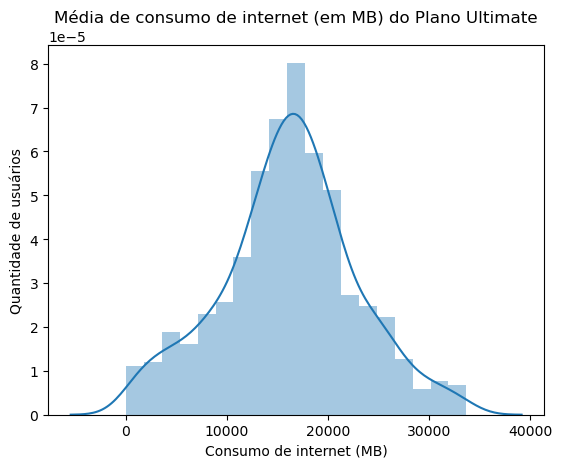

In [57]:
sns.distplot(df_ultimate['total_mb_used_internet'])
plt.title('Média de consumo de internet (em MB) do Plano Ultimate')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Consumo de internet (MB)')

plt.show()

Ao analisar o consumo de internet, observamos que os usuários do Plano Surf apresentam uma variância de aproximadamente 44.483.398 MB, o que está significativamente distante da média de cerca de 16.103 MB. Isso implica em uma dispersão estatística muito alta, com um desvio padrão de aproximadamente 6.669 MB. Como resultado, identificamos vários perfis de consumo, desde aqueles que utilizam significativamente mais internet até aqueles que utilizam menos, porém todos dentro da cota estabelecida, com poucos casos de excedente.

In [58]:
var, std, mean = calcular_estatisticas_chamadas(df_ultimate)

print("Estatísticas de Duração das Chamadas do Plano Ultimate :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Duração das Chamadas do Plano Ultimate :
Variância: 39297.57966386516
Desvio Padrão: 198.23617143161627
Média: 390.3797276853253


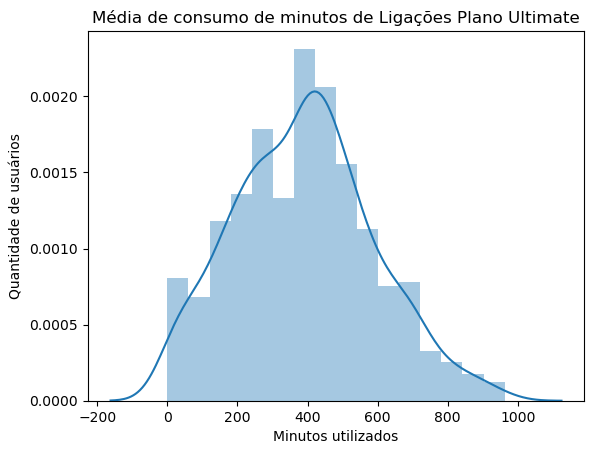

In [59]:
sns.distplot(df_ultimate['total_duration_calls'])
plt.title('Média de consumo de minutos de Ligações Plano Ultimate')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Minutos utilizados')

plt.show()

Ao analisar o padrão de consumo de tempo de chamadas, observamos que os usuários do Plano Ultimate apresentam uma variância de aproximadamente 39297 minutos, significativamente distante da média de 198 minutos. Isso indica uma dispersão estatística abaixo da média, com um desvio padrão de cerca de 390 minutos. Consequentemente, os usuários tendem a utilizar menos minutos de chamada, dentro de sua cota disponível.

In [60]:
var, std, mean = calcular_estatisticas_mensagens(df_ultimate)

print("Estatísticas de Contagem de Mensagens do Plano Ultimate :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Contagem de Mensagens do Plano Ultimate :
Variância: 854.0491083298965
Desvio Padrão: 29.22411860655333
Média: 32.65960665658094


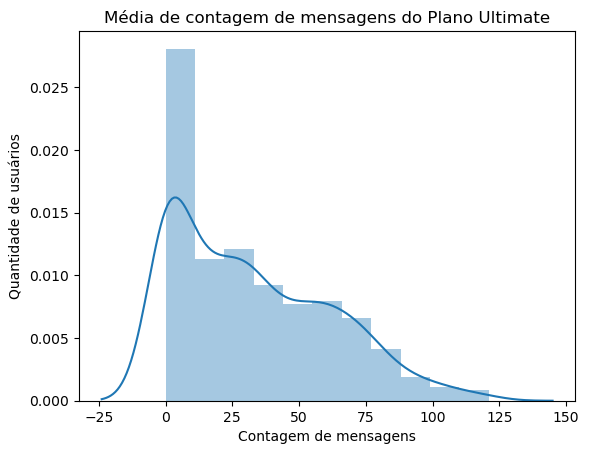

In [61]:
sns.distplot(df_ultimate['count_messages'])
plt.title('Média de contagem de mensagens do Plano Ultimate')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Contagem de mensagens')

plt.show()

Ao analisar o consumo de mensagens, observamos que os usuários do Plano Ultimate exibem uma variância de aproximadamente 854 mensagens, o que está em estreita proximidade com a média de cerca de 32 mensagens. Isso implica em uma dispersão estatística muito baixa, com um desvio padrão de aproximadamente 29 mensagens. Como resultado, os usuários tendem a manter um padrão consistente de quantidade de mensagens, bem abaixo da cota disponível.

In [62]:
var, std, mean = calcular_estatisticas_revenue(df_ultimate)

print("Estatísticas de Renda dos Usuários do Plano Ultimate :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Renda dos Usuários do Plano Ultimate :
Variância: 6.874128851602123
Desvio Padrão: 2.6218559936812174
Média: 70.3441452344932


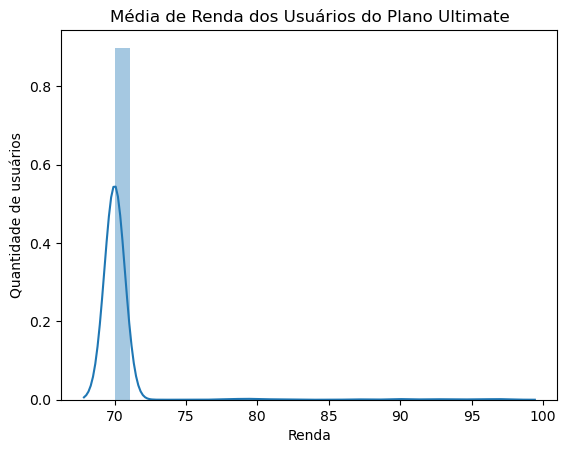

In [63]:
sns.distplot(df_ultimate['revenue'])
plt.title('Média de Renda dos Usuários do Plano Ultimate')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Renda')

plt.show()

Ao analisar a receita do plano, observamos que os usuários do Plano Ultimate apresentam uma variância de aproximadamente 4 dólares, o que está significativamente distante da média de cerca de 70 dólares. Isso implica em uma dispersão estatística muito baixa, com um desvio padrão de aproximadamente 2 dólares. Como resultado, os usuários tendem a manter um padrão consistente de valor de receita.

In [64]:
df_ultimate['revenue'].sum()

46497.48

In [65]:
df[df['plan_name']=='ultimate']['revenue'].sum()

52210.85

Acima podemos ver a Receita total do nosso Plano Ultimate  que é 46497.48, e com os valores atipicos 52210.85

### Plano Surf

In [66]:
var, std, mean = calcular_estatisticas_internet(df_surf)

print("Estatísticas de Renda dos Usuários do Plano Surf :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Renda dos Usuários do Plano Surf :
Variância: 39013423.486466
Desvio Padrão: 6246.072644987888
Média: 15158.159806728705


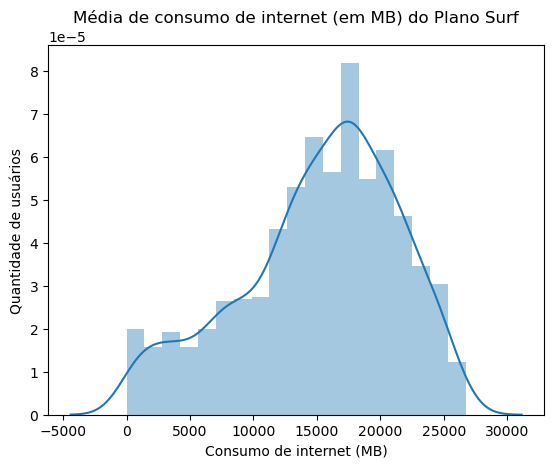

In [67]:
sns.distplot(df_surf['total_mb_used_internet'])
plt.title('Média de consumo de internet (em MB) do Plano Surf')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Consumo de internet (MB)')

plt.show()

Ao analisar o consumo de internet, observamos que os usuários do Plano Surf apresentam uma variância em torno de 39.013.423, significativamente distante da média de aproximadamente 15.158 MB. Isso indica uma dispersão estatística muito alta, com um desvio padrão em torno de 6.246 MB. Como resultado, os usuários tendem a exceder a cota de internet estabelecida.

In [68]:
var, std, mean = calcular_estatisticas_chamadas(df_surf)

print("Estatísticas de Duração das Chamadas do Plano Surf :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Duração das Chamadas do Plano Surf :
Variância: 40230.79148311346
Desvio Padrão: 200.57614883907175
Média: 383.2406943450251


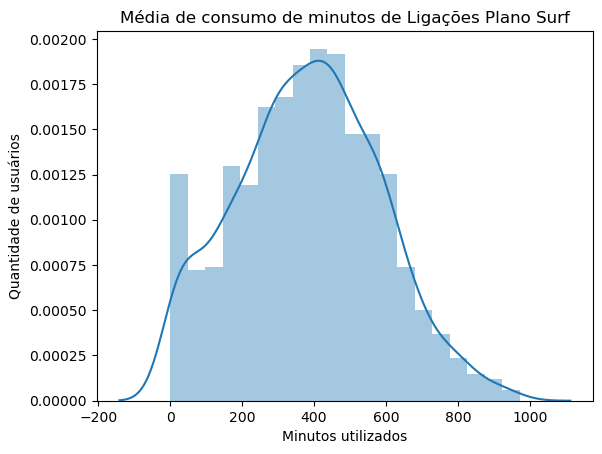

In [69]:
sns.distplot(df_surf['total_duration_calls'])
plt.title('Média de consumo de minutos de Ligações Plano Surf')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Minutos utilizados')

plt.show()

Ao analisar o consumo de tempo de ligações, observamos que os usuários do Plano Surf apresentam uma variância em torno de 40.230 minutos, significativamente distante da média de aproximadamente 383 minutos. Isso implica em uma dispersão estatística menor que a média, com um desvio padrão em torno de 200 minutos. Como resultado, a maioria dos usuários tende a utilizar quase toda a cota de ligações, e muitos ultrapassam essa cota.

In [70]:
var, std, mean = calcular_estatisticas_mensagens(df_surf)

print("Estatísticas de Contagem de Mensagens do Plano Surf :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Contagem de Mensagens do Plano Surf :
Variância: 729.4728029568037
Desvio Padrão: 27.008754191128542
Média: 27.084466714387975


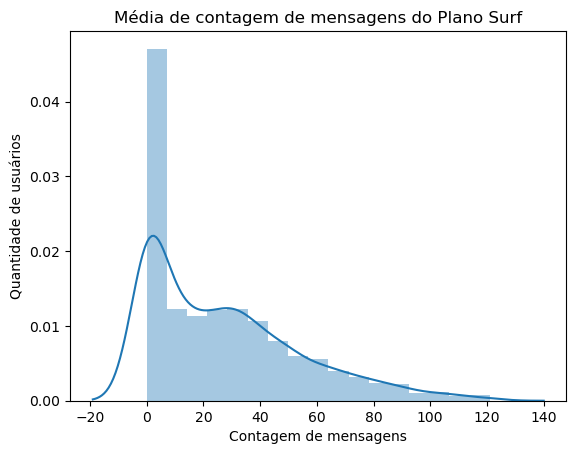

In [71]:
sns.distplot(df_surf['count_messages'])
plt.title('Média de contagem de mensagens do Plano Surf')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Contagem de mensagens')

plt.show()

Ao analisar o consumo de mensagens, observamos que os usuários do Plano Surf apresentam uma variância em torno de 729 mensagens, o que está significativamente distante da média de aproximadamente 27 mensagens. Isso implica em uma dispersão estatística muito baixa, com um desvio padrão em torno de 27 mensagens. Como resultado, os usuários tendem a manter um padrão consistente de quantidade de mensagens, bem abaixo da cota estabelecida para mensagens

In [72]:
var, std, mean = calcular_estatisticas_revenue(df_surf)

print("Estatísticas de Renda dos Usuários do Plano Surf :")
print("Variância:", var)
print("Desvio Padrão:", std)
print("Média:", mean)

Estatísticas de Renda dos Usuários do Plano Surf :
Variância: 1149.9231475039574
Desvio Padrão: 33.91051676845927
Média: 50.126735862562626


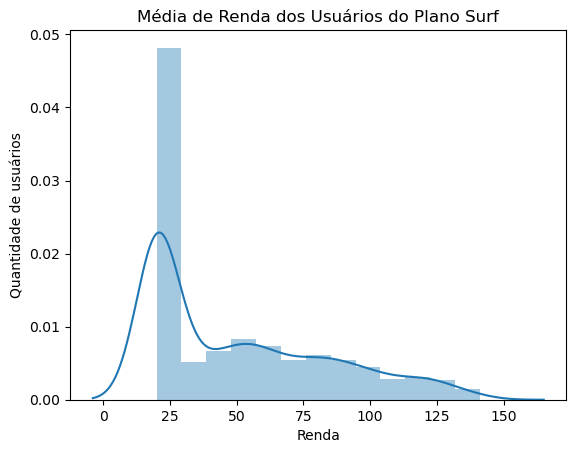

In [73]:
sns.distplot(df_surf['revenue'])
plt.title('Média de Renda dos Usuários do Plano Surf')
plt.ylabel('Quantidade de usuários')
plt.xlabel('Renda')

plt.show()

Ao analisar a receita do plano, observamos que os usuários do Plano Surf apresentam uma variância em torno de 1149 dólares, o que está significativamente distante da média de aproximadamente 50 dólares. Isso implica em uma dispersão estatística muito alta, com um desvio padrão em torno de 34 dólares. Como resultado, os usuários tendem a incorrer em penalidades financeiras.

## Etapa 6. Hipóteses <a id='hypothesys'></a>

In [74]:
from scipy import stats as st

### Hipótese sobre a Igualdade das Médias 

#### A receita média dos usuários dos planos Ultimate e Surf são iguais?

In [75]:
alpha = 0.05

In [76]:
results = st.ttest_ind(df_surf['revenue'], df_ultimate['revenue'],equal_var = False)

In [77]:
print('p-value:', results.pvalue)

p-value: 1.1367747233722477e-93


In [78]:
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


O valor-p indica que há diferença estatística entre as médias de receita dos planos, porém a análise não dispõe de dados suficientes para determinar a natureza específica dessa disparidade.

#### A receita média dos usuários da área de NY-NJ é igual dos usuários de outras regiões?

In [79]:
df_ny_nj = df_limp.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA' ")
df_other = df_limp.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA' ")

In [80]:
results_ny = st.ttest_ind(df_ny_nj['revenue'], df_other['revenue'],equal_var = False)

In [81]:
print('p-value:', results_ny.pvalue)

p-value: 0.0563040388468549


In [82]:
if results_ny.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós não podemos rejeitar a hipótese nula


O valor-p nos diz que os valores médios de receita diferem dos planos, mas não temos dados suficientes para dizer como.

Não podemos rejeitar a hipótese nula, pois o valor-p indica que, embora os valores médios para NY-NJ em comparação com as demais cidades sejam diferentes, essa probabilidade não é suficiente para concluir que há uma diferença significativa entre os valores médios gastos.

[Voltar ao Índice](#back)

## Conclusão geral <a id='end'></a>

Neste projeto, foram importadas bibliotecas como "pandas" e "numpy" para a construção de gráficos visando proporcionar uma melhor visualização e compreensão do problema.

Com base nos estudos, realizamos o pré-processamento dos dados. Em cada coluna, efetuamos a padronização de estilos, corrigimos valores discrepantes, substituímos valores ausentes com base em análises de outras colunas com dados devidamente preenchidos, verificamos a existência de duplicatas na base de dados e investigamos os dados coletados para determinar quais planos geram maior receita.

A partir da Análise Exploratória de Dados, concluímos que o Plano Surf gera a maior receita devido à sua natureza restritiva, com penalidades rigorosas, o que resulta em uma receita mais elevada. No entanto, isso também pode gerar uma imagem negativa para novos usuários.

Com base nas hipóteses levantadas, não podemos afirmar que a média dos usuários dos planos Ultimate e Surf são iguais. Da mesma forma, a receita média dos usuários da área de NY-NJ ser igual à dos usuários de outras regiões não é suficiente para concluir que há uma diferença significativa entre os valores médios gastos.